In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
#import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
#import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
%matplotlib inline
from scipy.stats import normaltest
#new import
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import normaltest
from sklearn.linear_model import Ridge
# yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_profiling import ProfileReport
from helpers import *

c:\users\craxt\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

In [3]:
df = df.drop(columns=['Id'])

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 80)

# Descripcion de los Datos Crudos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#informcacion sobre el tipo de datos
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

# Descripcion de los Datos Numericos

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


# Informacion de las variables categoricas

In [9]:
df.describe(include=[object]).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# Get all numeric columns

In [10]:
df = df.select_dtypes(include=np.number)

In [11]:
df.shape

(1460, 37)

In [12]:
### Analisis univariable "SalePrice"

In [13]:
# Resumen de estadística descriptiva:

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\users\craxt\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


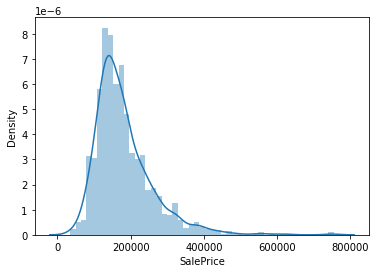

In [14]:
# Histograma:

sns.distplot(df['SalePrice']);

In [15]:
# Asimetría y curtosis:

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### relacion de dispersion grlivarea/saleprice:

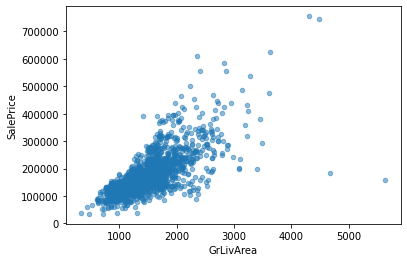

In [16]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

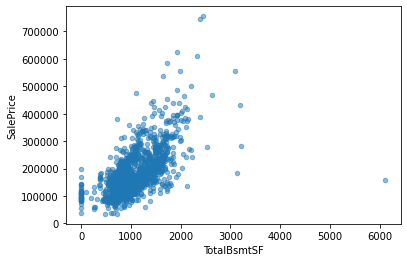

In [17]:
# Diagrama de dispersión totalbsmtsf/saleprice:

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

### relacion con variables cateogircas

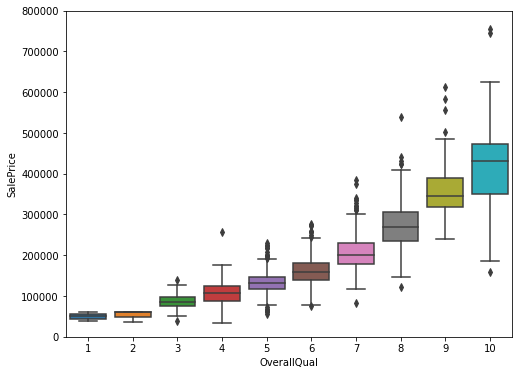

In [18]:
# Diagrama de cajas overallqual/saleprice:

var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

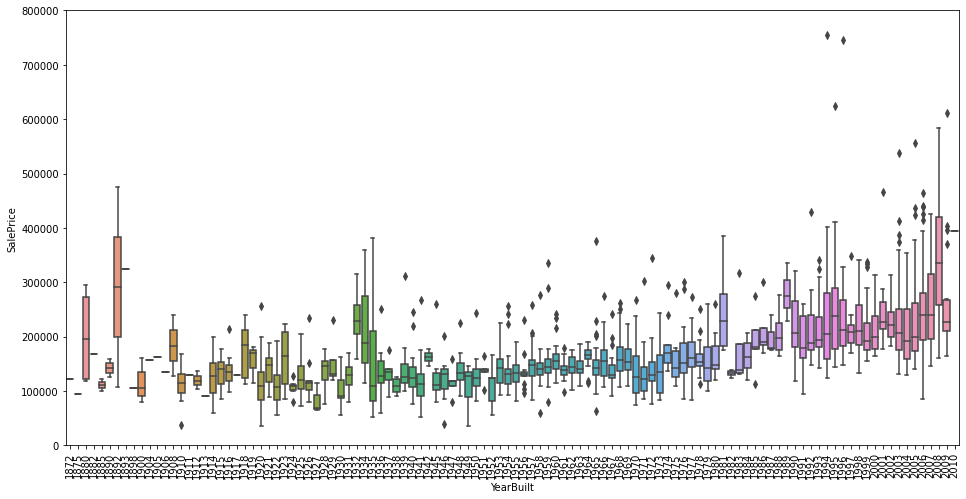

In [19]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Normalizar Datos variables numericas

In [20]:
df = (df-df.min())/(df.max()-df.min())

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,0.217043,0.248827,0.0,0.000000,0.176471,0.294118,1.0
LotFrontage,1201.0,0.167979,0.083167,0.0,0.130137,0.164384,0.202055,1.0
LotArea,1460.0,0.043080,0.046653,0.0,0.029229,0.038227,0.048150,1.0
OverallQual,1460.0,0.566591,0.153666,0.0,0.444444,0.555556,0.666667,1.0
OverallCond,1460.0,0.571918,0.139100,0.0,0.500000,0.500000,0.625000,1.0
YearBuilt,1460.0,0.719332,0.218862,0.0,0.594203,0.731884,0.927536,1.0
YearRemodAdd,1460.0,0.581096,0.344090,0.0,0.283333,0.733333,0.900000,1.0
MasVnrArea,1452.0,0.064803,0.113166,0.0,0.000000,0.000000,0.103750,1.0
BsmtFinSF1,1460.0,0.078604,0.080811,0.0,0.000000,0.067948,0.126196,1.0
BsmtFinSF2,1460.0,0.031580,0.109443,0.0,0.000000,0.000000,0.000000,1.0


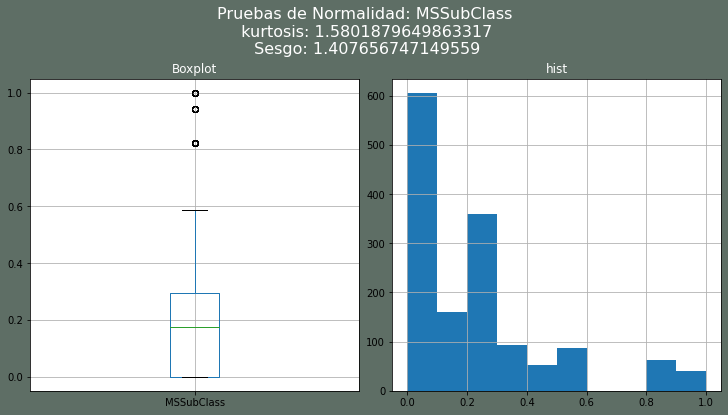

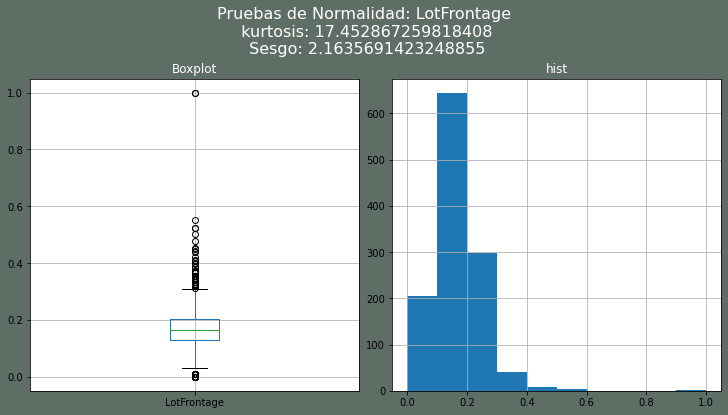

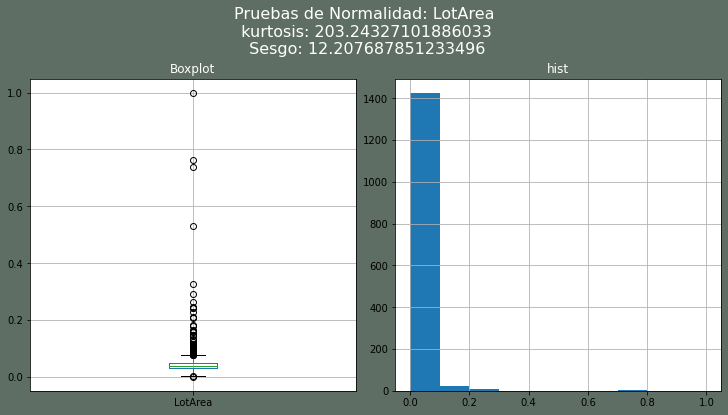

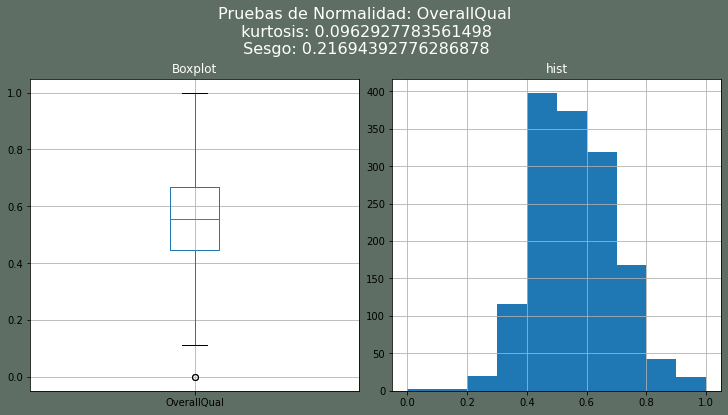

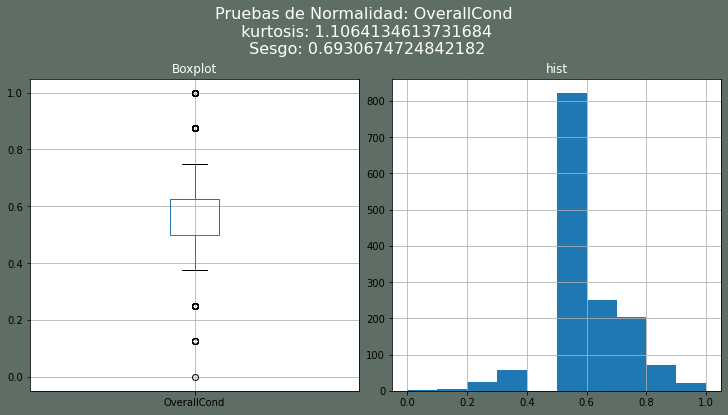

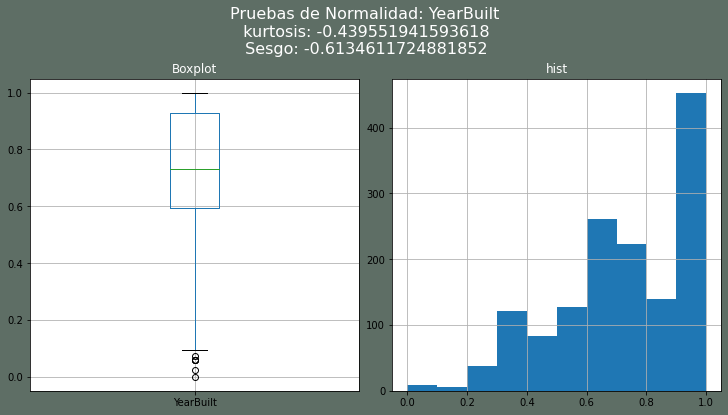

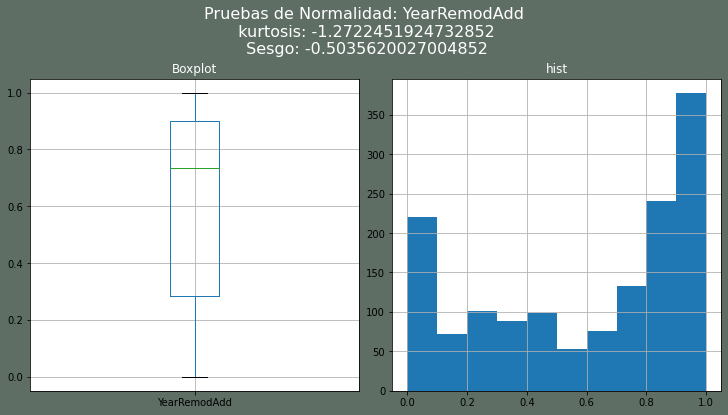

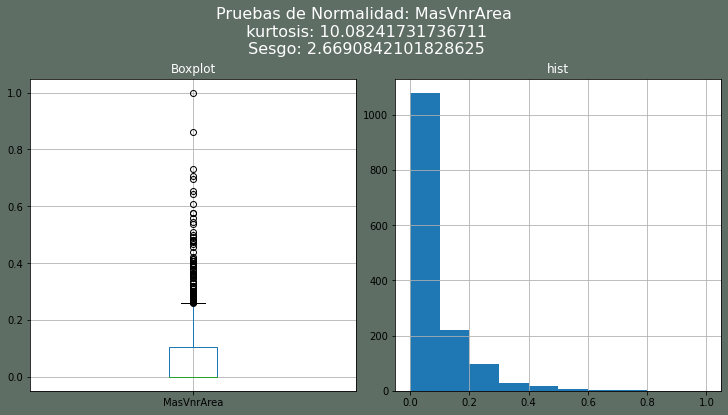

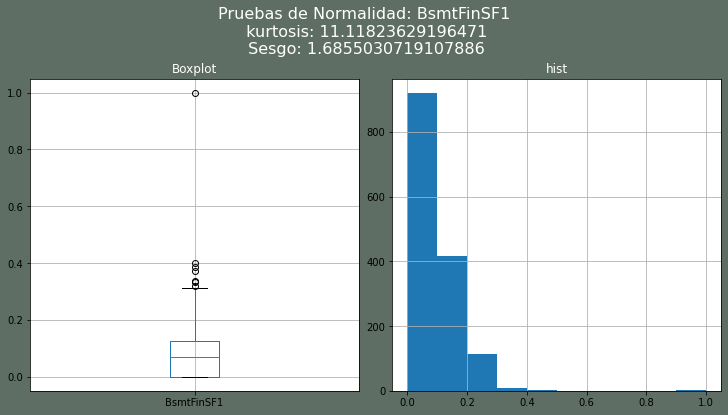

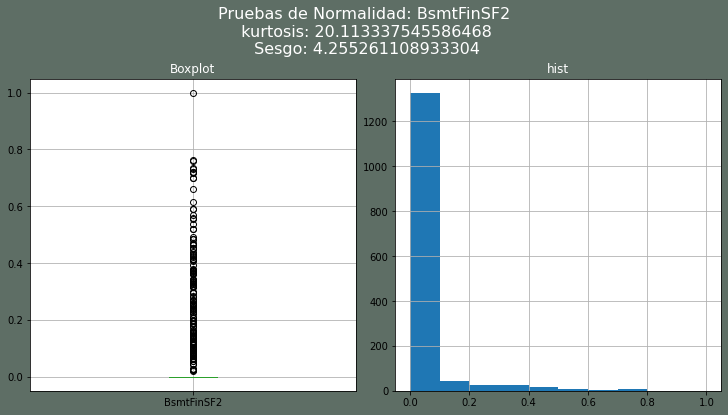

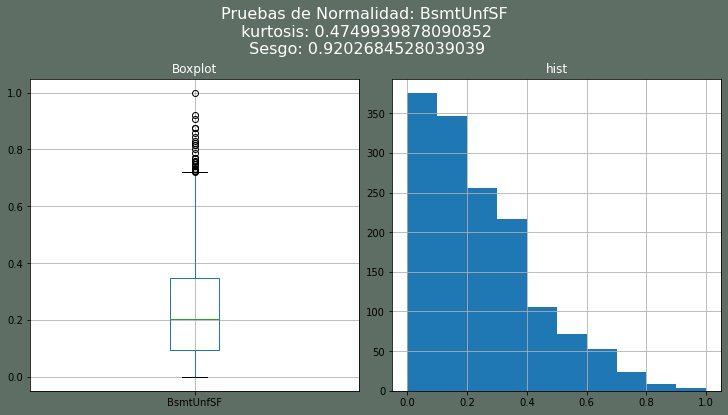

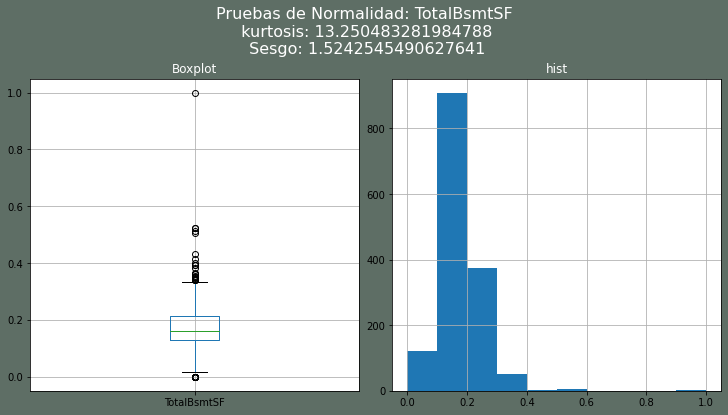

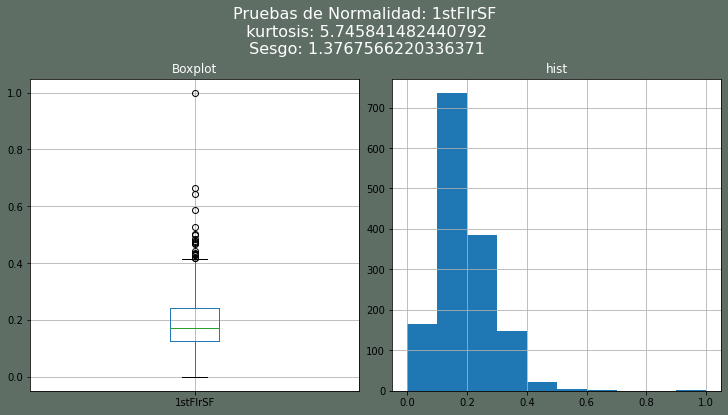

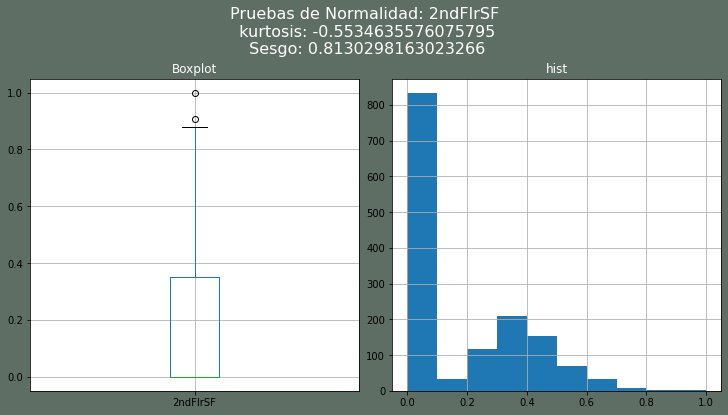

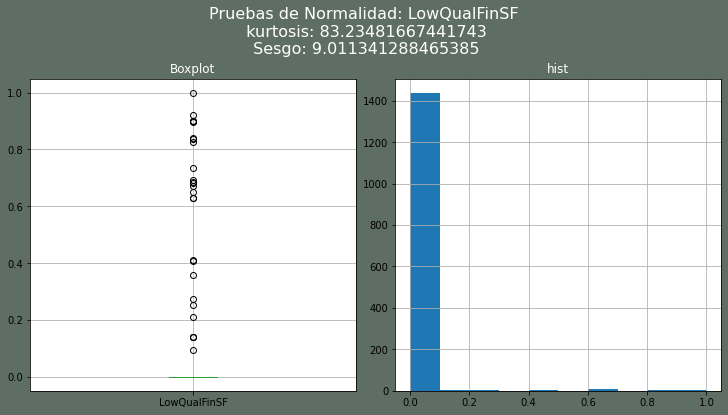

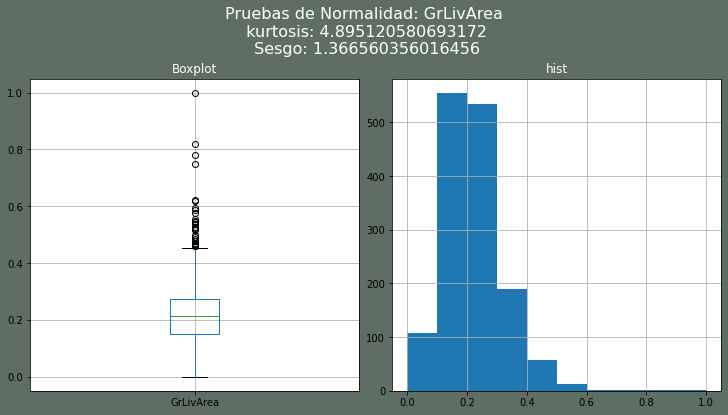

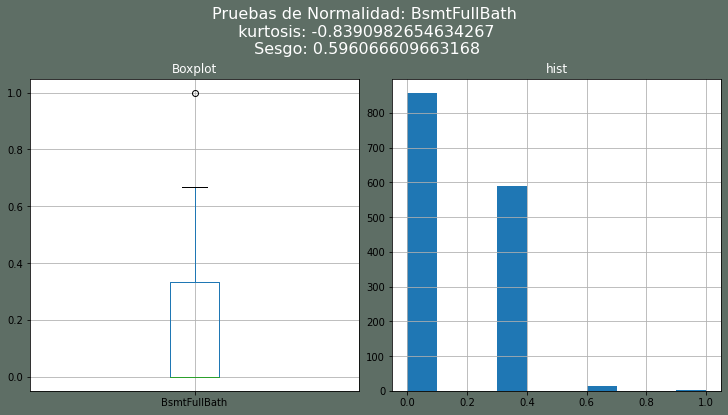

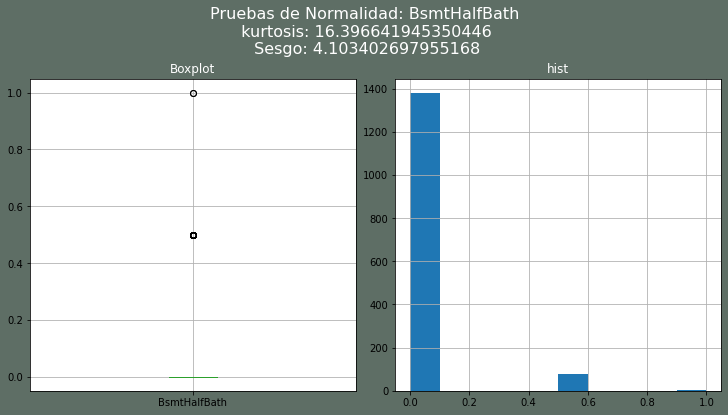

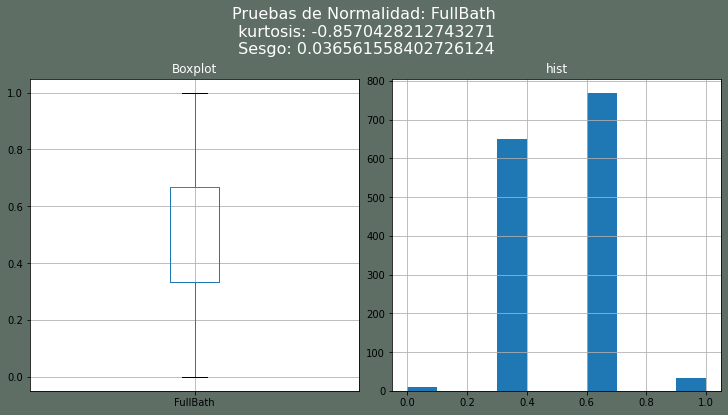

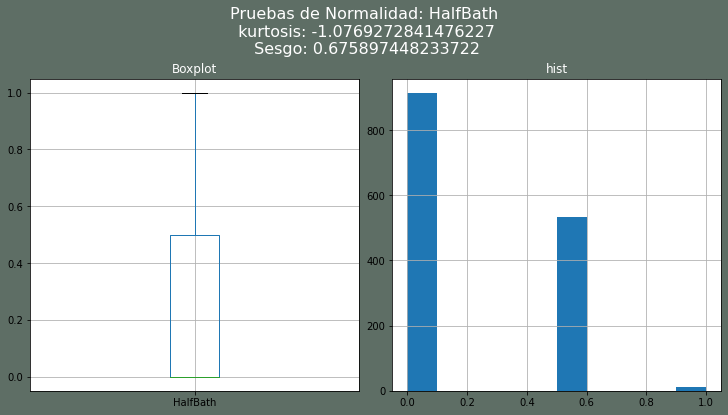

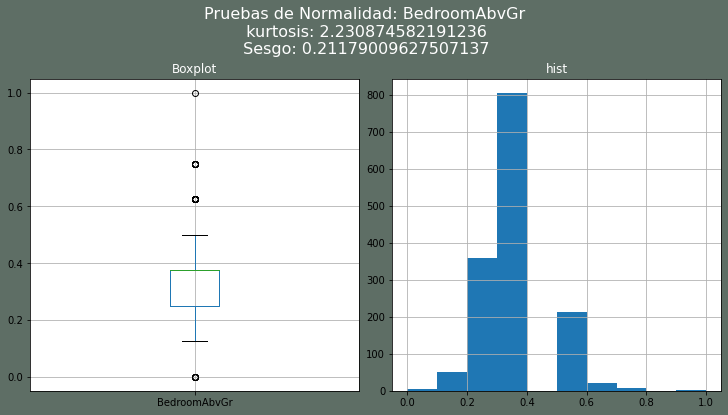

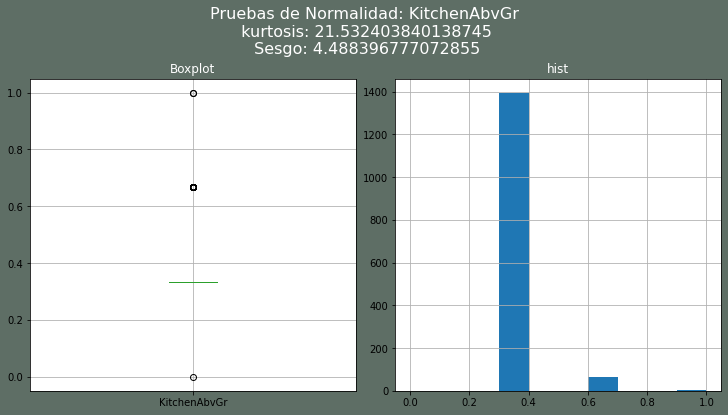

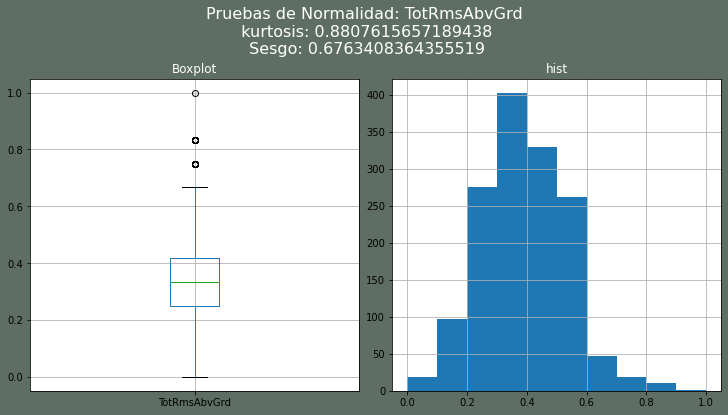

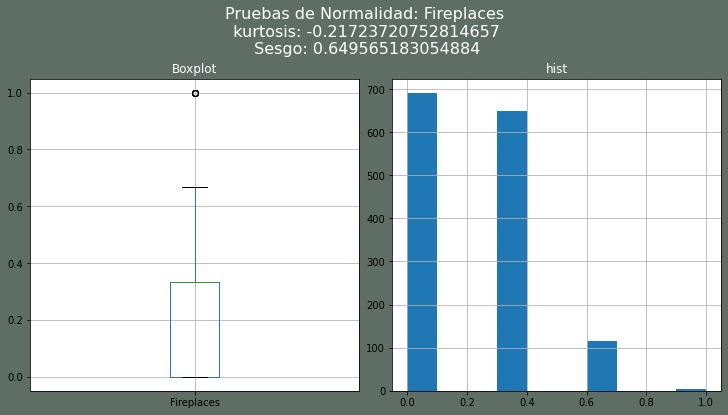

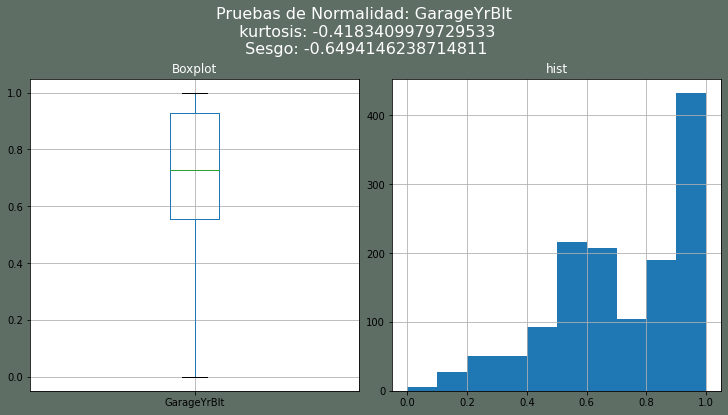

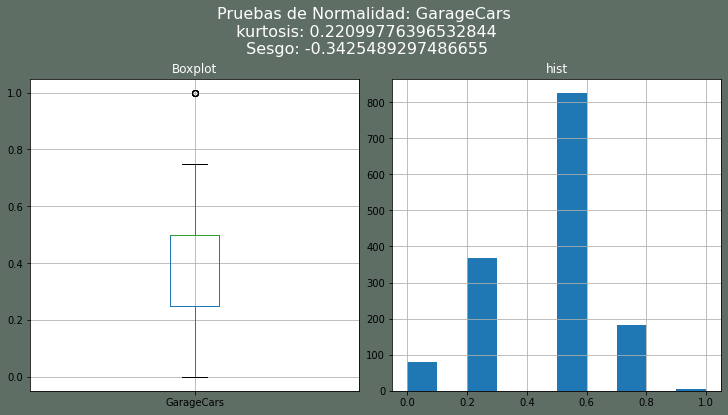

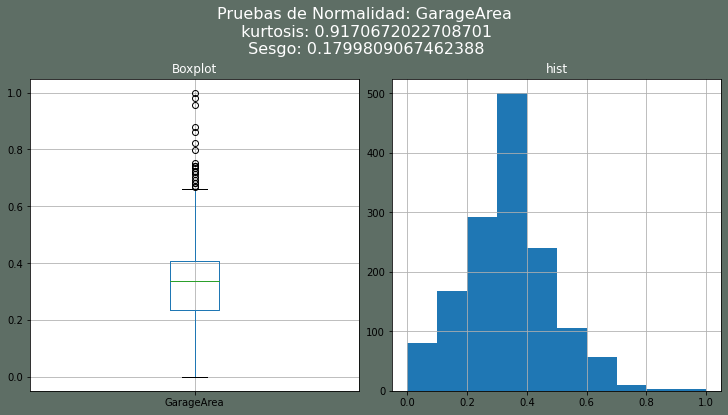

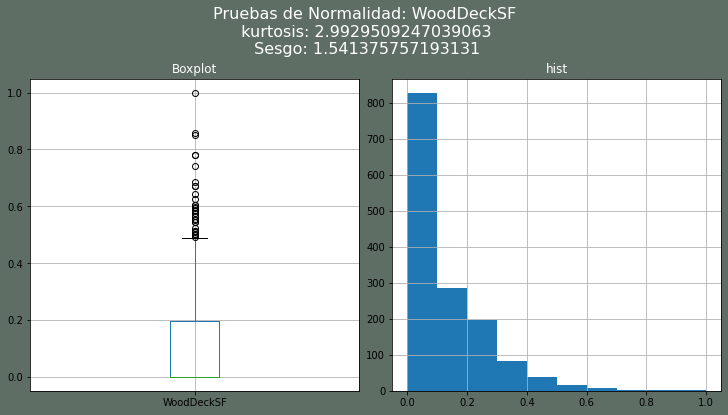

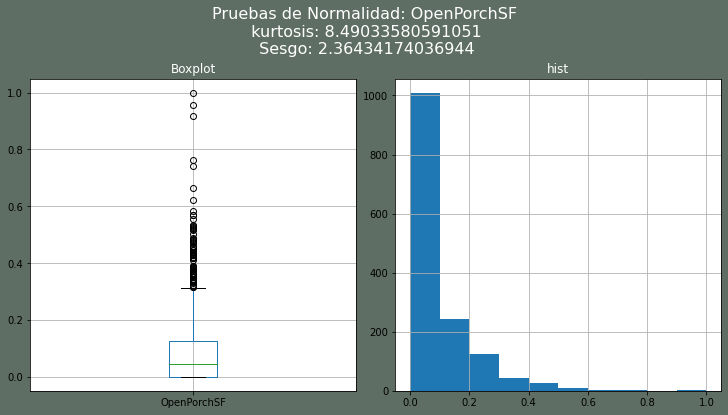

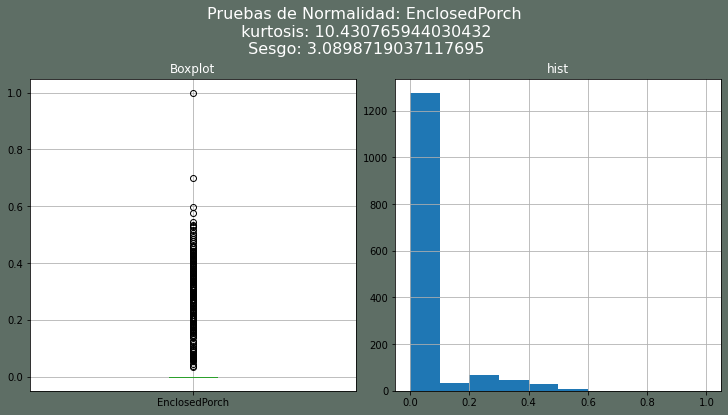

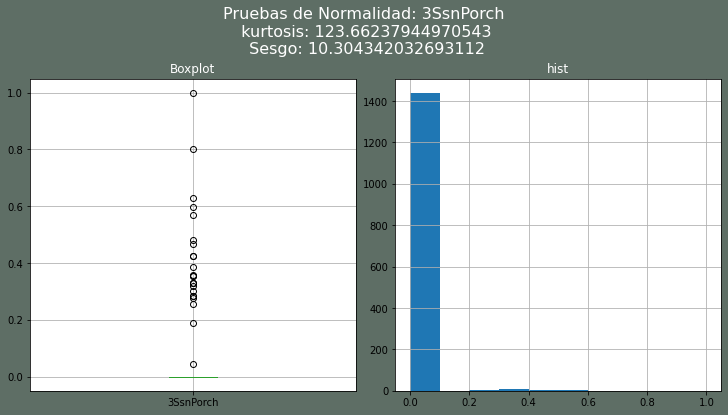

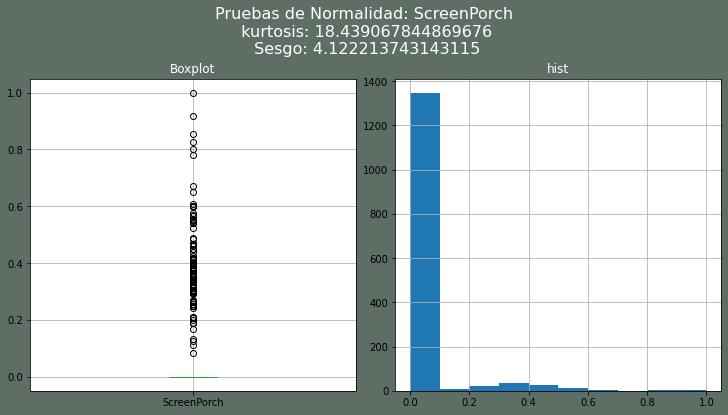

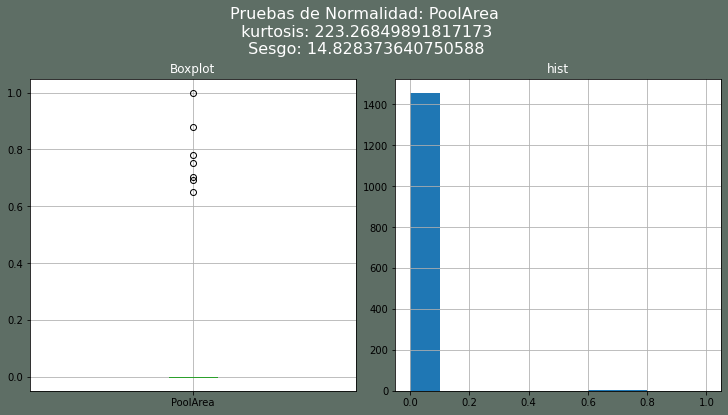

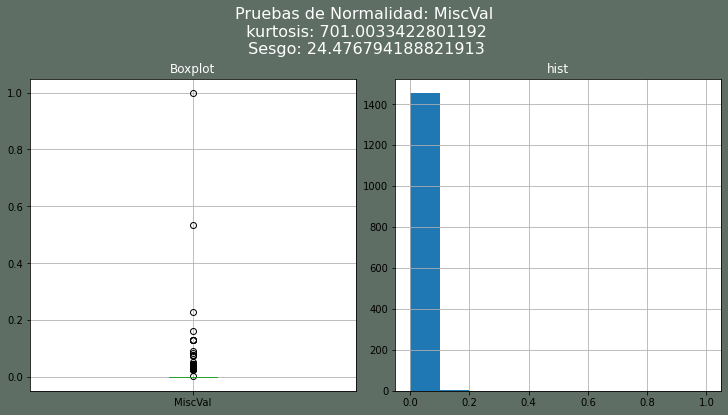

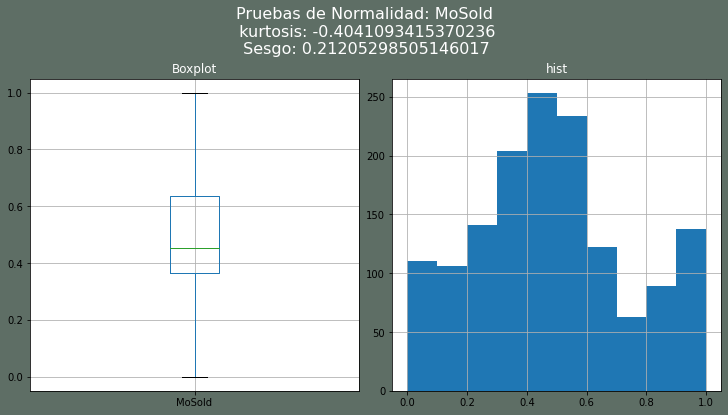

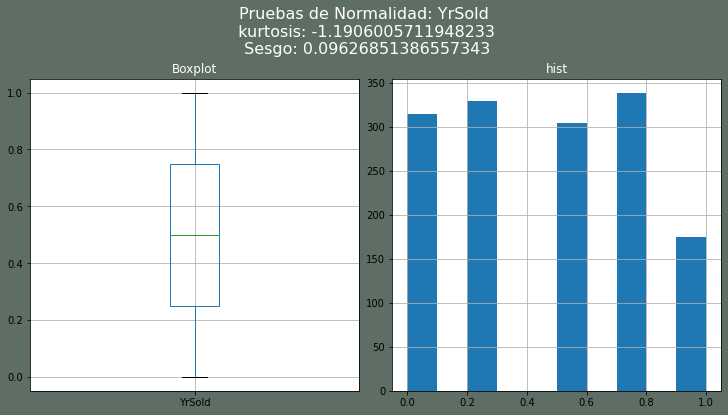

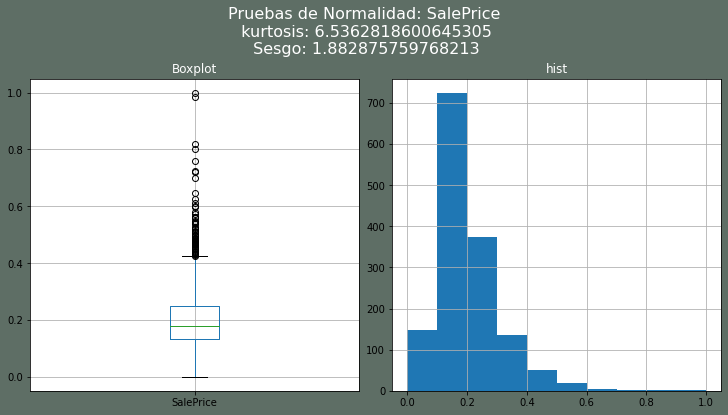

In [22]:
for col in df.columns:
    graph_of_normalization(df,col)
    

### Analisis de correlacion variables numericas

<AxesSubplot:>

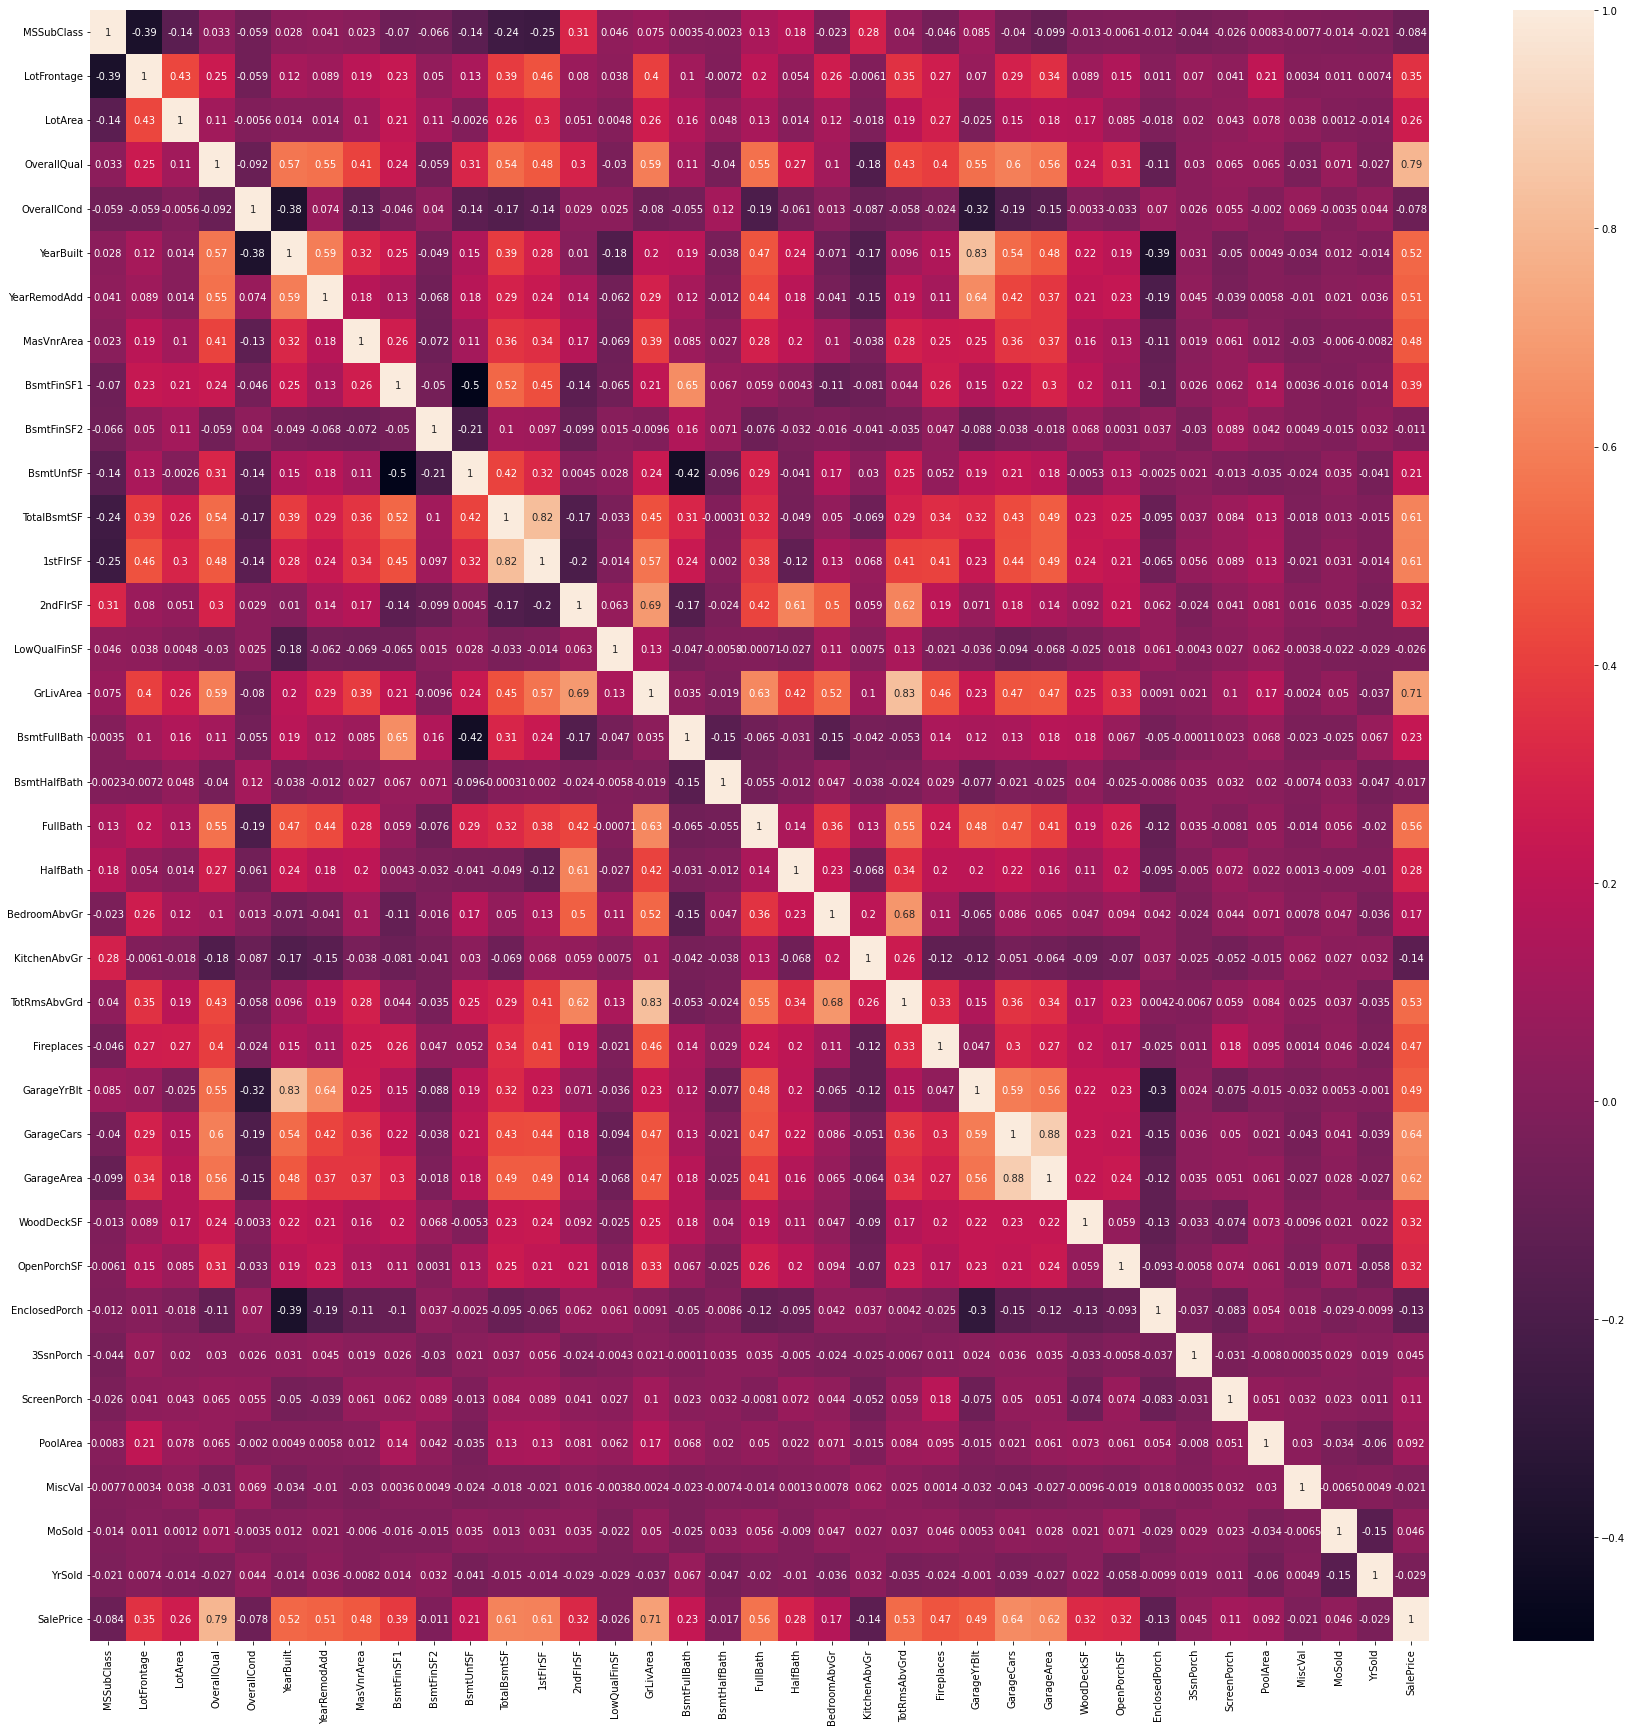

In [23]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,annot=True, ax=ax)



### Matriz de correlacion "saleprice"

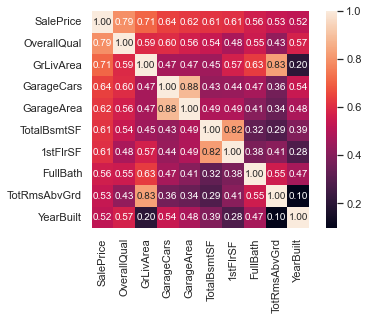

In [24]:
# Matriz de correlación
k = 10 # Número de variables.
cols = df_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.0)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [25]:
corr = df.corr()
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False).style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


c:\users\craxt\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


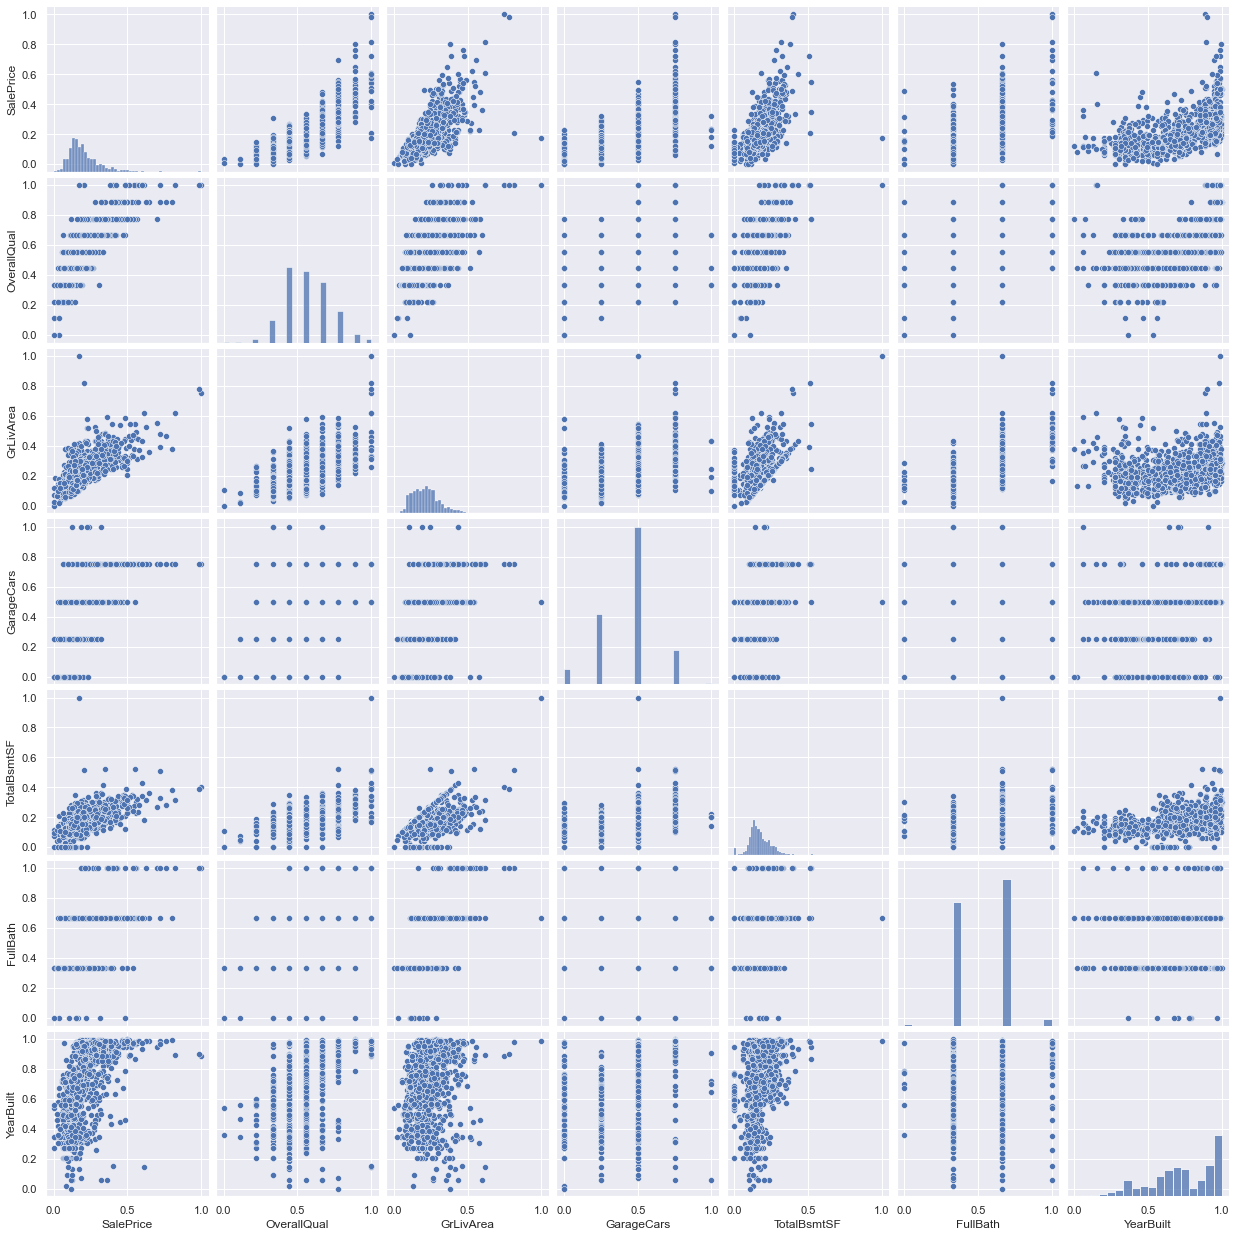

In [26]:
# Scatter plot:

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

# Clean the df

In [27]:
df=clean_dataset(df)

In [28]:
df.shape

(562, 37)

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,562.0,0.169458,0.185144,0.000000,0.000000,0.176471,0.235294,0.588235
LotFrontage,455.0,0.162773,0.051528,0.030822,0.133562,0.164384,0.195205,0.301370
LotArea,562.0,0.037052,0.012751,0.007418,0.030148,0.036119,0.044404,0.076188
OverallQual,562.0,0.582839,0.139170,0.111111,0.444444,0.555556,0.666667,1.000000
OverallCond,562.0,0.545819,0.088071,0.375000,0.500000,0.500000,0.625000,0.750000
YearBuilt,562.0,0.806914,0.182048,0.275362,0.681159,0.898551,0.956522,0.992754
YearRemodAdd,562.0,0.654715,0.326277,0.000000,0.366667,0.816667,0.916667,1.000000
MasVnrArea,557.0,0.046536,0.065842,0.000000,0.000000,0.000000,0.089375,0.257500
BsmtFinSF1,562.0,0.078890,0.072781,0.000000,0.000000,0.078490,0.131999,0.286853
BsmtFinSF2,562.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
# hay data que no aporta nada, asi que le doy un drop a esas columnas
df=df.drop(['EnclosedPorch', '3SsnPorch' , 'ScreenPorch', 'PoolArea', 'MiscVal', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2', 'KitchenAbvGr'], axis=1)

In [31]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (562, 28)
Nombre columnas: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 1455
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    562 non-null    float64
 1   LotFrontage   455 non-null    float64
 2   LotArea       562 non-null    float64
 3   OverallQual   562 non-null    float64
 4   OverallCond   562 non-null    float64
 5   YearBuilt     562 non-null    float64
 6   YearRemodAdd  562 non-null    float64
 7   MasVnrArea    557 non-null    float64
 8   BsmtFinSF1    562 non-null    float64
 9   BsmtUnfSF     562 non-null    float64
 10  TotalBsmtSF   562 non-null    float64
 11  1stFlrSF      562 non-null    float64
 12  2ndFlrSF      562 non-null    float64
 13  GrLivArea     562 non-null    float64
 14  BsmtFullBath  562 non-null    float64
 15  FullBath      562 non-null    float64
 16  HalfBath      562 non-null    float64
 17  BedroomAbvGr  562 non-null    float64
 18  TotRmsAbvGrd  562 non-null   

In [33]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,562.000000,455.000000,562.000000,562.000000,562.000000,562.000000,562.000000,557.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,539.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,0.169458,0.162773,0.037052,0.582839,0.545819,0.806914,0.654715,0.046536,0.078890,0.265085,0.174222,0.179871,0.149196,0.205722,0.141163,0.536180,0.191281,0.350534,0.358837,0.183274,0.784517,0.455071,0.336948,0.106189,0.075374,0.484956,0.447064,0.200656
std,0.185144,0.051528,0.012751,0.139170,0.088071,0.182048,0.326277,0.065842,0.072781,0.182003,0.048915,0.066722,0.201672,0.074508,0.166048,0.167632,0.243223,0.082517,0.109542,0.193530,0.203999,0.167172,0.131662,0.115285,0.082355,0.241687,0.330728,0.078004
min,0.000000,0.030822,0.007418,0.111111,0.375000,0.275362,0.000000,0.000000,0.000000,0.000000,0.044190,0.023864,0.000000,0.019593,0.000000,0.333333,0.000000,0.125000,0.083333,0.000000,0.127273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004166
25%,0.000000,0.133562,0.030148,0.444444,0.500000,0.681159,0.366667,0.000000,0.000000,0.119863,0.140180,0.123967,0.000000,0.148267,0.000000,0.333333,0.000000,0.250000,0.250000,0.000000,0.627273,0.500000,0.275035,0.000000,0.000000,0.363636,0.250000,0.142428
50%,0.176471,0.164384,0.036119,0.555556,0.500000,0.898551,0.816667,0.000000,0.078490,0.222817,0.165303,0.167393,0.000000,0.206481,0.000000,0.666667,0.000000,0.375000,0.333333,0.333333,0.890909,0.500000,0.338505,0.115519,0.060329,0.454545,0.500000,0.195945
75%,0.235294,0.195205,0.044404,0.666667,0.625000,0.956522,0.916667,0.089375,0.131999,0.378211,0.208265,0.225218,0.352542,0.251601,0.333333,0.666667,0.500000,0.375000,0.416667,0.333333,0.945455,0.500000,0.406206,0.195449,0.117002,0.636364,0.750000,0.248715
max,0.588235,0.301370,0.076188,1.000000,0.750000,0.992754,1.000000,0.257500,0.286853,0.714897,0.327332,0.409133,0.653269,0.431047,0.666667,1.000000,0.500000,0.500000,0.666667,0.666667,1.000000,0.750000,0.654443,0.471412,0.310786,1.000000,1.000000,0.423344


In [34]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.5,0.949275,0.883333,0.12250,0.125089,0.064212,0.140098,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.090909,0.50,0.241078
2,0.235294,0.160959,0.046507,0.666667,0.5,0.934783,0.866667,0.10125,0.086109,0.185788,0.150573,0.134465,0.419370,0.273549,0.333333,0.666667,0.5,0.375,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.727273,0.50,0.261908
4,0.235294,0.215753,0.060576,0.777778,0.5,0.927536,0.833333,0.21875,0.116052,0.209760,0.187398,0.186095,0.509927,0.351168,0.333333,0.666667,0.5,0.500,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,1.000000,0.50,0.298709
6,0.000000,0.184932,0.041057,0.777778,0.5,0.956522,0.916667,0.11625,0.242558,0.135702,0.275941,0.312070,0.000000,0.256217,0.333333,0.666667,0.0,0.375,0.416667,0.333333,0.945455,0.50,0.448519,0.297550,0.104205,0.636364,0.25,0.377864
10,0.000000,0.167808,0.046274,0.444444,0.5,0.673913,0.250000,0.00000,0.160524,0.057363,0.170213,0.162001,0.000000,0.133007,0.333333,0.333333,0.0,0.375,0.250000,0.000000,0.590909,0.25,0.270804,0.000000,0.000000,0.090909,0.50,0.131371


### Análisis de Componentes Principales.

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [55]:
X = df
X2 = X
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X,columns=X2.columns).set_index(X2.index)
X = X.dropna()
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0.4,0.443038,0.378101,0.625,0.333333,0.939394,0.883333,0.475728,0.436072,0.089820,0.338728,0.248958,0.633062,0.582418,0.5,0.5,1.0,0.666667,0.714286,0.0,0.927083,0.666667,0.590517,0.000000,0.358824,0.090909,0.50,0.565181
2,0.4,0.481013,0.568409,0.625,0.333333,0.919192,0.866667,0.393204,0.300185,0.259880,0.375723,0.287076,0.641957,0.617216,0.5,0.5,1.0,0.666667,0.428571,0.5,0.906250,0.666667,0.655172,0.000000,0.247059,0.727273,0.50,0.614875
4,0.4,0.683544,0.772990,0.750,0.333333,0.909091,0.833333,0.849515,0.404571,0.293413,0.505780,0.421084,0.780578,0.805861,0.5,0.5,1.0,1.000000,0.857143,0.5,0.895833,1.000000,0.900862,0.475248,0.494118,1.000000,0.50,0.702667
6,0.0,0.569620,0.489159,0.750,0.333333,0.949495,0.916667,0.451456,0.845584,0.189820,0.818497,0.748064,0.000000,0.575092,0.5,0.5,0.0,0.666667,0.571429,0.5,0.937500,0.666667,0.685345,0.631188,0.335294,0.636364,0.25,0.891502
10,0.0,0.506329,0.565011,0.375,0.333333,0.555556,0.250000,0.000000,0.559605,0.080240,0.445087,0.358547,0.000000,0.275641,0.5,0.0,0.0,0.666667,0.285714,0.0,0.531250,0.333333,0.413793,0.000000,0.000000,0.090909,0.50,0.303462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0.0,0.417722,0.381499,0.625,0.333333,0.949495,0.900000,0.257282,0.000000,0.851497,0.665896,0.586063,0.000000,0.450549,0.0,0.5,0.0,0.666667,0.571429,0.0,0.937500,0.666667,0.674569,0.475248,0.352941,0.909091,0.25,0.469438
1448,0.3,0.506329,0.603548,0.250,1.000000,0.000000,0.833333,0.000000,0.000000,0.335329,0.167630,0.213222,0.407709,0.415751,0.0,0.0,1.0,0.333333,0.428571,0.0,0.375000,0.333333,0.413793,0.415842,0.141176,0.363636,0.25,0.245486
1451,0.0,0.607595,0.433290,0.750,0.333333,0.989899,0.983333,0.470874,0.000000,0.941916,0.753179,0.678976,0.000000,0.521978,0.0,0.5,0.0,0.666667,0.571429,0.5,0.979167,1.000000,0.905172,0.000000,0.211765,0.363636,0.75,0.825542
1454,0.0,0.405063,0.313532,0.625,0.333333,0.949495,0.916667,0.000000,0.253243,0.485629,0.549711,0.466349,0.000000,0.358516,0.5,0.5,0.0,0.333333,0.428571,0.0,0.937500,0.666667,0.431034,0.000000,0.664706,0.818182,0.75,0.487328


In [56]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.27109941 0.17568649 0.09235392]
[14.40340461 11.59498119  8.40675791]


### Reglas de asociacion

### Hallazgos y conclusiones

In [ ]:
Hallazgos y conclusiones.
- Hace un resumen de los hallazgos en el análisis exploratorio
- Llega a conclusiones sobre el análisis de componentes principales
- Determina las reglas de asociación más interesantes.